오차 제곱 합
 (10*a + 60*b + c + 1)**2 + (20*a + 70*b + c + 1)**2 + (30*a + 80*b + c + 1)**2 + (40*a + 30*b + c - 1)**2 + (60*a + 20*b + c - 1)**2 + (70*a + 40*b + c - 1)**2

a에 대해 편미분:  23000*a + 19200*b + 460*c - 220
b에 대해 편미분:  19200*a + 35600*b + 600*c + 240
c에 대해 편미분:  460*a + 600*b + 12*c

a는 0.0205 
b는 -0.0289 
c는 0.6618


<IPython.core.display.Javascript object>


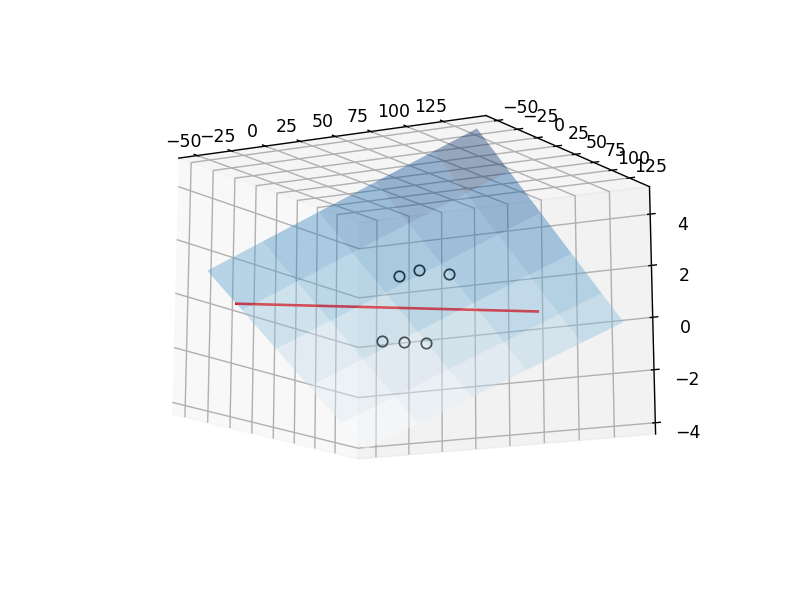

입력한 동물은 수컷으로 판단됨
None


In [2]:
import sympy as sym
import numpy as np

file = open("Linear_classification.txt", 'r')
asam = file.readline()
list_as = asam.split(' ')
bsam = file.readline()
list_bs = bsam.split(' ')
csam = file.readline()
list_cs = csam.split(' ')
dsam = file.readline()
list_ds = dsam.split(' ')
esam = file.readline()
list_es = esam.split(' ')
fsam = file.readline()
list_fs = fsam.split(' ')

a = sym.Symbol('a')
b = sym.Symbol('b')
c = sym.Symbol('c')

# int형으로 바꿔줌 
for i in range(3):
    list_as[i] = (int)(list_as[i])
    list_bs[i] = (int)(list_bs[i])
    list_cs[i] = (int)(list_cs[i])
    list_ds[i] = (int)(list_ds[i])
    list_es[i] = (int)(list_es[i])
    list_fs[i] = (int)(list_fs[i])
    
# 각 샘플에 대한 오차
ras = a*list_as[0] + b*list_as[1] + c - list_as[2]
rbs = a*list_bs[0] + b*list_bs[1] + c - list_bs[2]
rcs = a*list_cs[0] + b*list_cs[1] + c - list_cs[2]
rds = a*list_ds[0] + b*list_ds[1] + c - list_ds[2]
res = a*list_es[0] + b*list_es[1] + c - list_es[2]
rfs = a*list_fs[0] + b*list_fs[1] + c - list_fs[2]

R2 = ras**2 + rbs**2 + rcs**2 + rds**2 + res**2 + rfs**2  # 오차 제곱 합
print("오차 제곱 합\n", R2)

ra = sym.diff(R2, a)  # a에 대해 편미분
print("\na에 대해 편미분: ", ra)
rb = sym.diff(R2, b)  # b에 대해 편미분
print("b에 대해 편미분: ", rb)
rc = sym.diff(R2, c)  # c에 대해 편미분
print("c에 대해 편미분: ", rc)

# 편미분한 각 식의 상수들 
w1 = -float(ra.subs({a: 0, b: 0, c: 0}))
w2 = -float(rb.subs({a: 0, b: 0, c: 0}))
w3 = -float(rc.subs({a: 0, b: 0, c: 0}))
wlist = [[w1], [w2], [w3]] 

# 편미분한 각 식의 a 계수
x1 = float(sym.diff(ra, a))
x2 = float(sym.diff(rb, a))
x3 = float(sym.diff(rc, a))

# 편미분한 각 식의 b 계수
y1 = float(sym.diff(ra, b))
y2 = float(sym.diff(rb, b))
y3 = float(sym.diff(rc, b))

# 편미분한 각 식의 c 계수
z1 = float(sym.diff(ra, c))
z2 = float(sym.diff(rb, c))
z3 = float(sym.diff(rc, c))

xyz = [[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]]
abc = [[a], [b], [c]]

# 행렬로 계산
inv_xyz = np.linalg.inv(xyz) 
result = np.dot(inv_xyz, wlist)
print('\na는 %.4f \nb는 %.4f \nc는 %.4f' %(result[0], result[1], result[2]))

# 3차원 그래프
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [list_as[0], list_bs[0], list_cs[0], list_ds[0], list_es[0], list_fs[0]]
y = [list_as[1], list_bs[1], list_cs[1], list_ds[1], list_es[1], list_fs[1]]
z = [list_as[2], list_bs[2], list_cs[2], list_ds[2], list_es[2], list_fs[2]]

X = np.arange(-0.5, 1.5, 0.1)*100
Y = np.arange(-0.5, 1.5, 0.1)*100
X, Y = np.meshgrid(X, Y)
Z = (float(-0.027) * Y) + (float(0.021) * X) + float(0.599)

ax.plot(x, y, z, linestyle="none", marker="o", mfc="none", markeredgecolor="k") #샘플 출력
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력
ax.plot([-50, 100], [-16.7037, 99.9629], [0,0],'r-') # 선 출력

plt.show()

def checkpoint(ca, cb):
    check = result[0]*ca + result[1]*cb + result[2]
    
    if ( check > 0 ):
        print("입력한 동물은 수컷으로 판단됨")
    else:
        print("입력한 동물은 암컷으로 판단됨")
        
print(checkpoint(50, 30))